> Exploratory Data Analysis

In [1]:
pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('IBM2017.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...,...
741,2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
742,2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
743,2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
744,2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


> Data Inspection

In [4]:
# Checking for Null Values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# Checking for Duplicate Rows
df['Date'].duplicated().sum()

0

In [6]:
# Statistical Description
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,25.362393,25.383575,25.329357,25.360314,24.743237,25414.209115
std,0.403531,0.396169,0.415628,0.402146,0.628802,29873.223614
min,24.020000,24.530001,23.100000,24.020000,23.859383,0.000000
25%,25.010000,25.030001,24.969999,25.004999,24.224379,9025.000000
50%,25.391999,25.410000,25.355000,25.379999,24.513036,18500.000000
75%,25.730000,25.759750,25.709999,25.740000,25.352125,30900.000000
max,26.290001,26.290001,26.201000,26.260000,26.224167,343900.000000


In [7]:
# Checking for Rows Data Types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

> Data Cleaning

In [8]:
# Fixing the DateTime format conversion
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0


In [9]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
# Setting Datetime as Index
dt= df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...
2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


> Visualizations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Close Price')

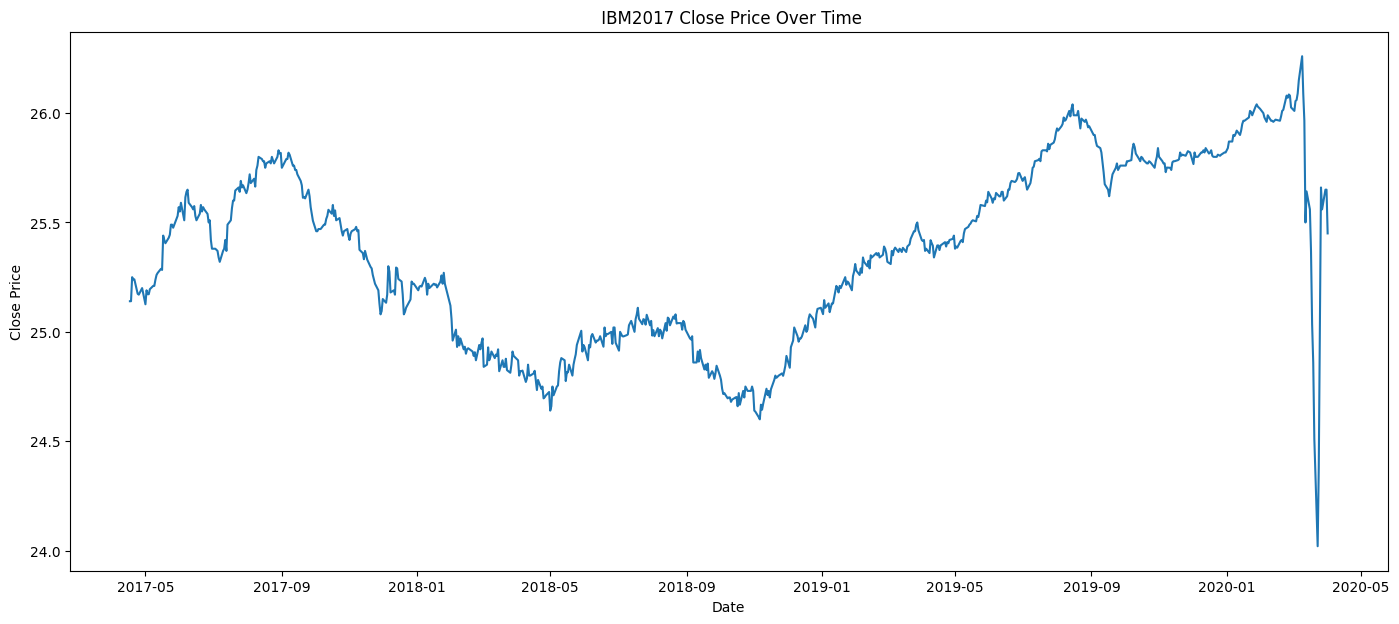

In [12]:
# Line Plot for Stock Prices based on Closing Price

plt.figure(figsize=(17,7))
plt.plot(dt.index, dt['Close'])
plt.title(' IBM2017 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

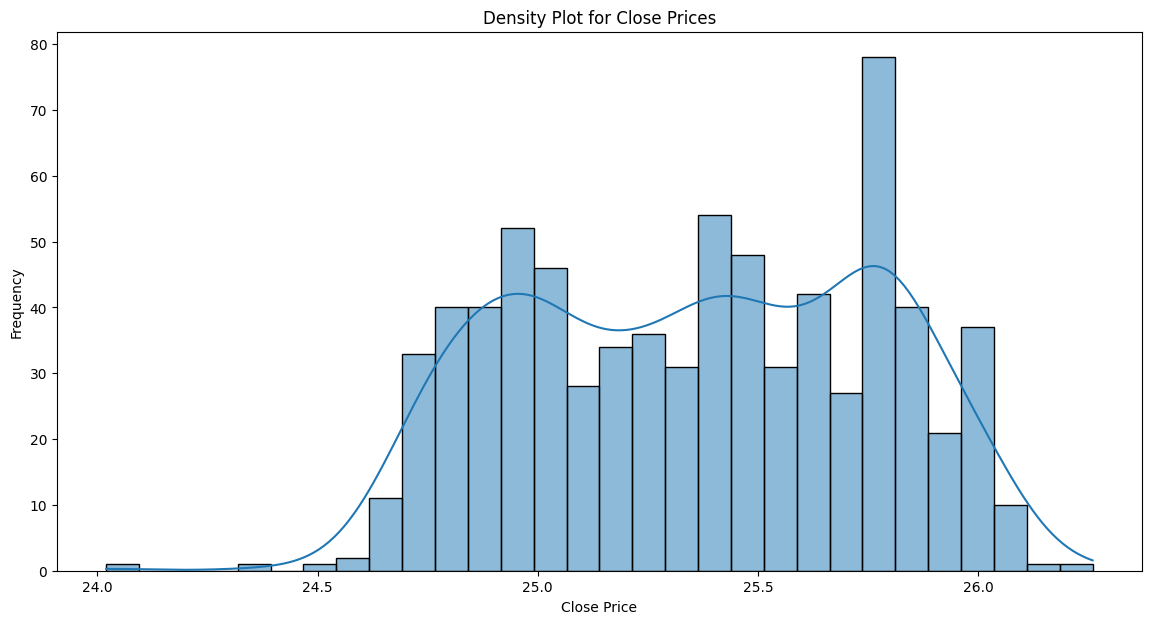

In [13]:
# Density Plots
plt.figure(figsize=(14,7))
sns.histplot(dt['Close'], kde=True, bins=30)
plt.title('Density Plot for Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

> Observations for Density Plot

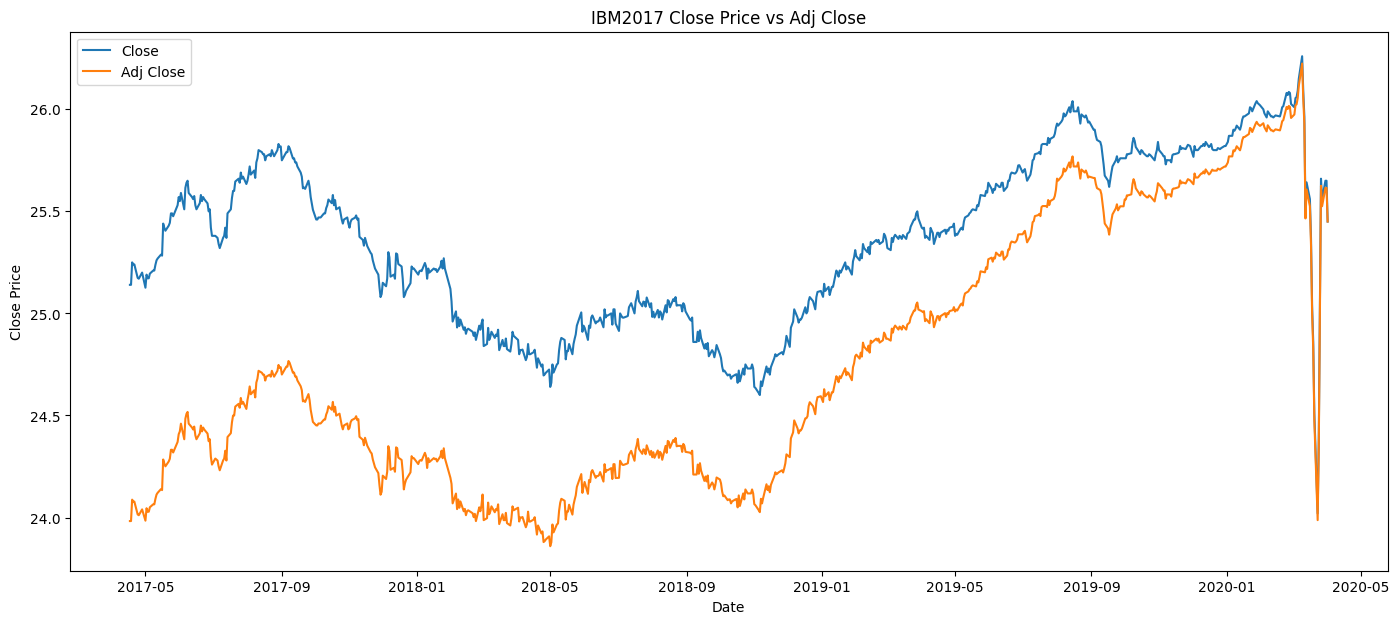

In [14]:
# Line Plot for Stock Prices (Closing Price vs Adjusted Close)

plt.figure(figsize=(17,7))
plt.plot(dt.index, dt['Close'], label = 'Close')
plt.plot(dt.index, dt['Adj Close'], label = 'Adj Close')
plt.title('IBM2017 Close Price vs Adj Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

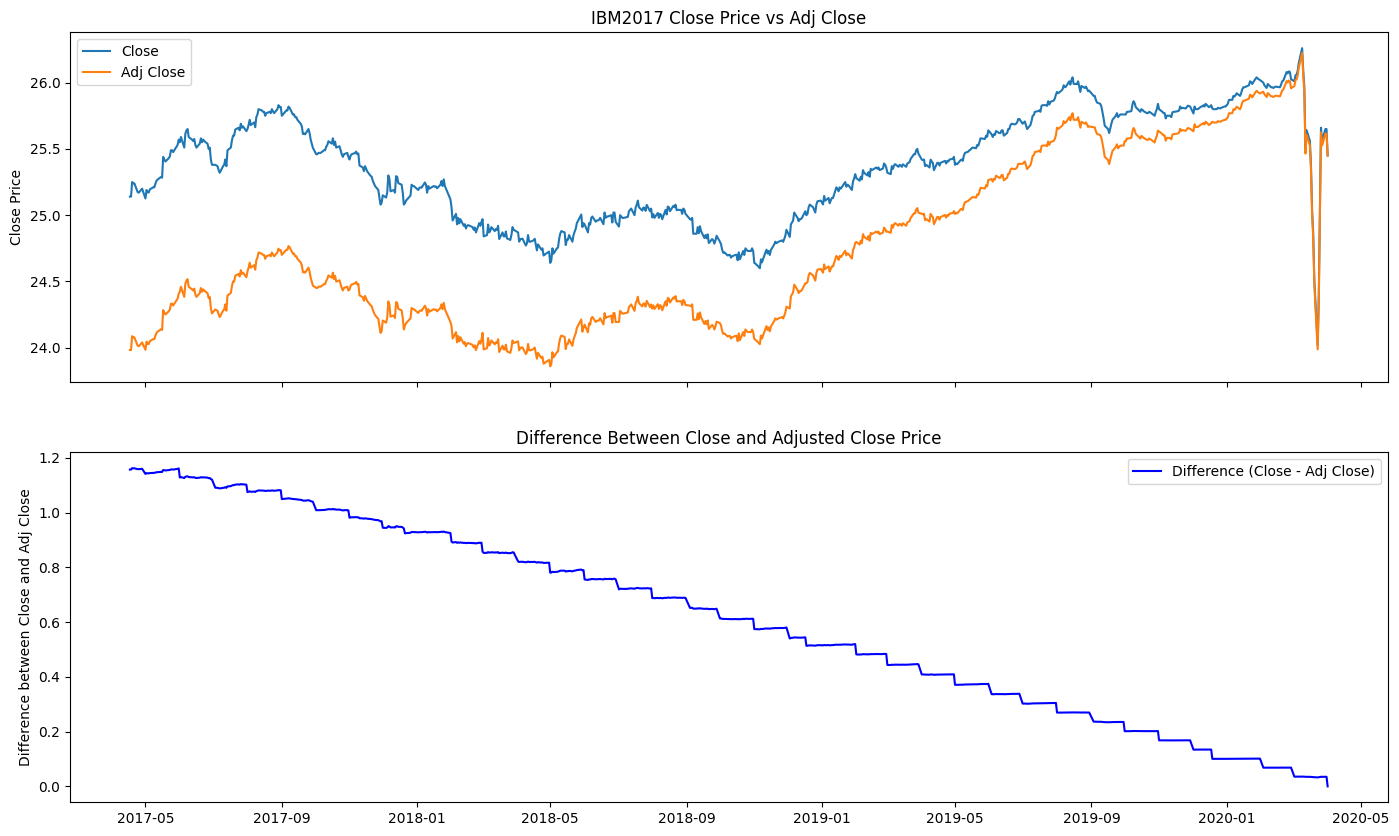

In [15]:
# Plot the difference and ratio
dt['Difference'] = dt['Close'] - dt['Adj Close']
 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 10), sharex=True)

# Plot for Close Price and Adj Close Price
ax1.plot(dt.index, dt['Close'], label = 'Close')
ax1.plot(dt.index, dt['Adj Close'], label = 'Adj Close')
ax1.set_title('IBM2017 Close Price vs Adj Close')
ax1.set_ylabel('Close Price')
ax1.legend()

# Plot the difference
ax2.plot(dt.index, dt['Difference'], label='Difference (Close - Adj Close)', color='blue')
ax2.set_title('Difference Between Close and Adjusted Close Price')
ax2.set_ylabel('Difference between Close and Adj Close')
ax2.legend()
plt.show()

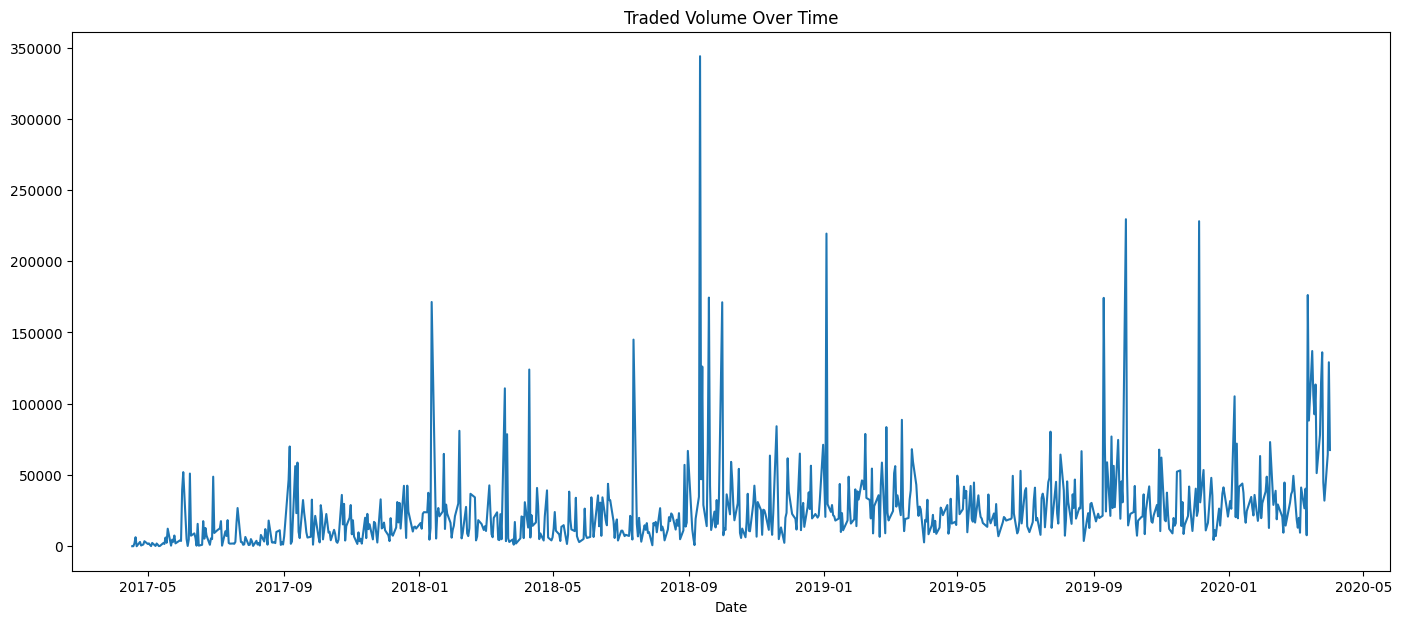

In [16]:
# Volumne Traded Over Time
plt.figure(figsize=(17,7))
plt.plot(dt.index, dt.Volume)
plt.title('Traded Volume Over Time')
plt.xlabel('Date')
plt.show()

> Observations for Decomposition Plots

In [17]:
# Decomposing the time series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dt['Close'], model='additive', period=365)

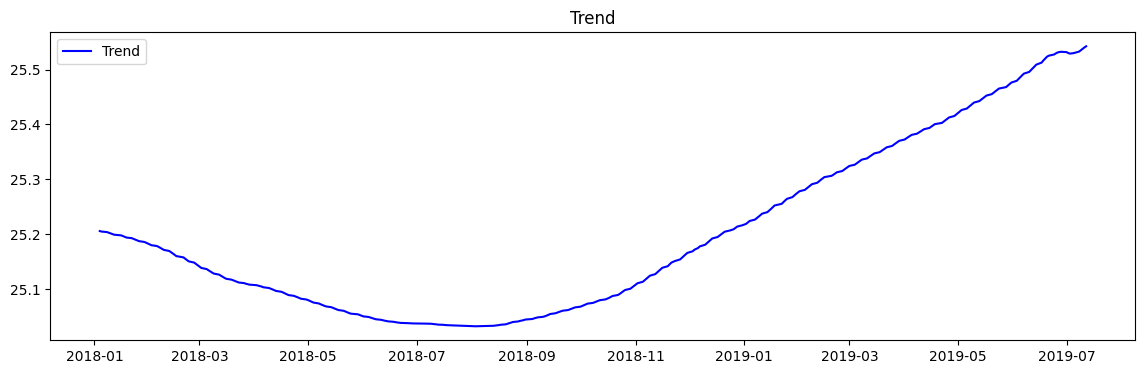

In [18]:
# Plotting Trend
plt.figure(figsize=(14,4))
plt.plot(result.trend, label='Trend', color='blue')
plt.title('Trend')
plt.legend()
plt.show()

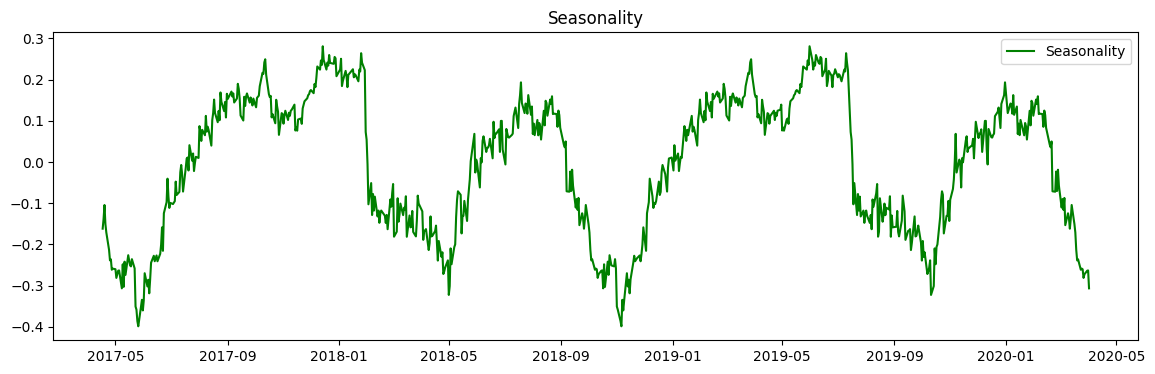

In [19]:
# Plotting Seasonal Component
plt.figure(figsize=(14,4))
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()
plt.show()

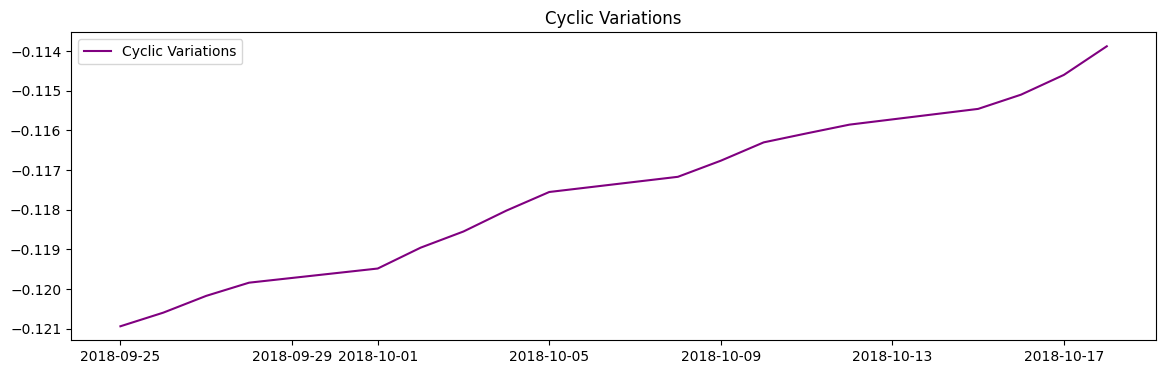

In [20]:
# Plotting Cyclic Component
cyclic = result.trend - result.trend.rolling(window = 365, center= True).mean()
plt.figure(figsize=(14,4))
plt.plot(cyclic, label='Cyclic Variations', color='purple')
plt.title('Cyclic Variations')
plt.legend()
plt.show()

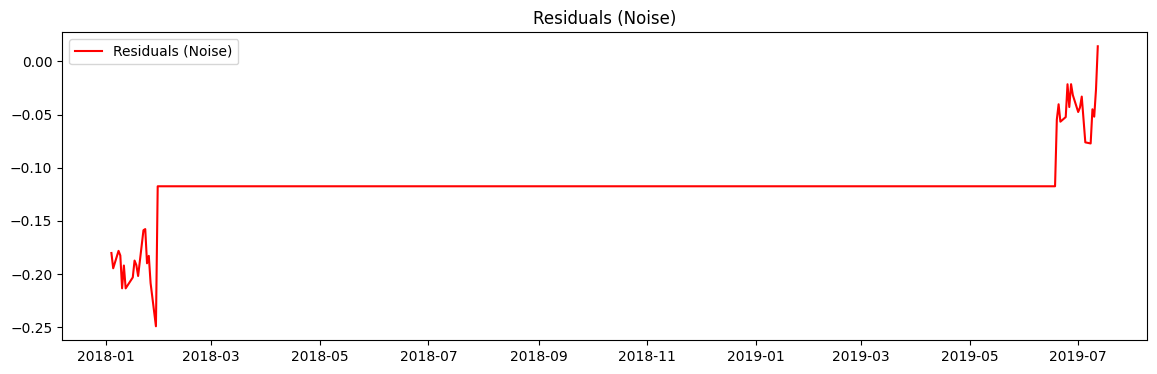

In [21]:
# Plotting Residuals
plt.figure(figsize=(14,4))
plt.plot(result.resid, label='Residuals (Noise)', color='red')
plt.title('Residuals (Noise)')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

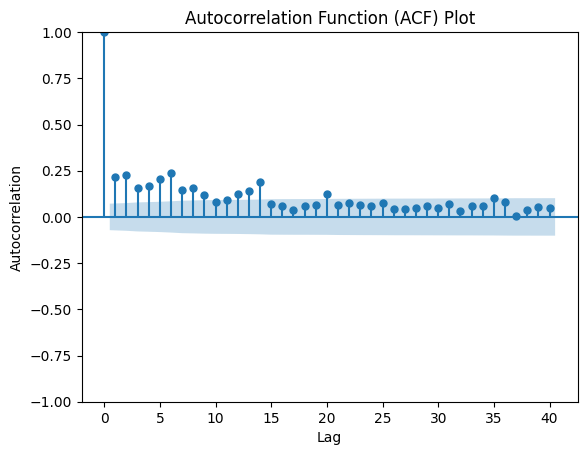

In [22]:
# Seasonality using Auto Correlation
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plot_acf(dt['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>